In [19]:
#Classic, Data Manipulation

import pandas as pd
import numpy as np

#Plots
import matplotlib.pyplot as plt
import seaborn as sns


#Data processing, metrics and modeling

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, precision_recall_curve,precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# to display Image files
from PIL import Image as PILImage


#ignore warning messages 
import warnings
warnings.filterwarnings('ignore')

In [20]:
df = pd.read_csv('health care diabetes.csv')

In [21]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [22]:
df.shape

(768, 9)

In [23]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [24]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [25]:
for i in df.columns[1:-1]:
    l = len(df[df[i]==0])
    if l>=1:
        print(i,'---- has total {} Zero values'.format(l))
    else:
        print(i,'---- has no zero values and is good to go')

Glucose ---- has total 5 Zero values
BloodPressure ---- has total 35 Zero values
SkinThickness ---- has total 227 Zero values
Insulin ---- has total 374 Zero values
BMI ---- has total 11 Zero values
DiabetesPedigreeFunction ---- has no zero values and is good to go
Age ---- has no zero values and is good to go


A person can not have zero values for Glucose, Bloodpressure, SkinThickness, Insulin, BMI and Diabetes Pedigress Function. All these zero values don't make any sense hence these are nothing but the missing values. So we'll treat them with missing values imputation techniques

In [27]:
df_copy = df.copy(deep = True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [28]:
df_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Let's see the distribution of data points in order to fill the null values.

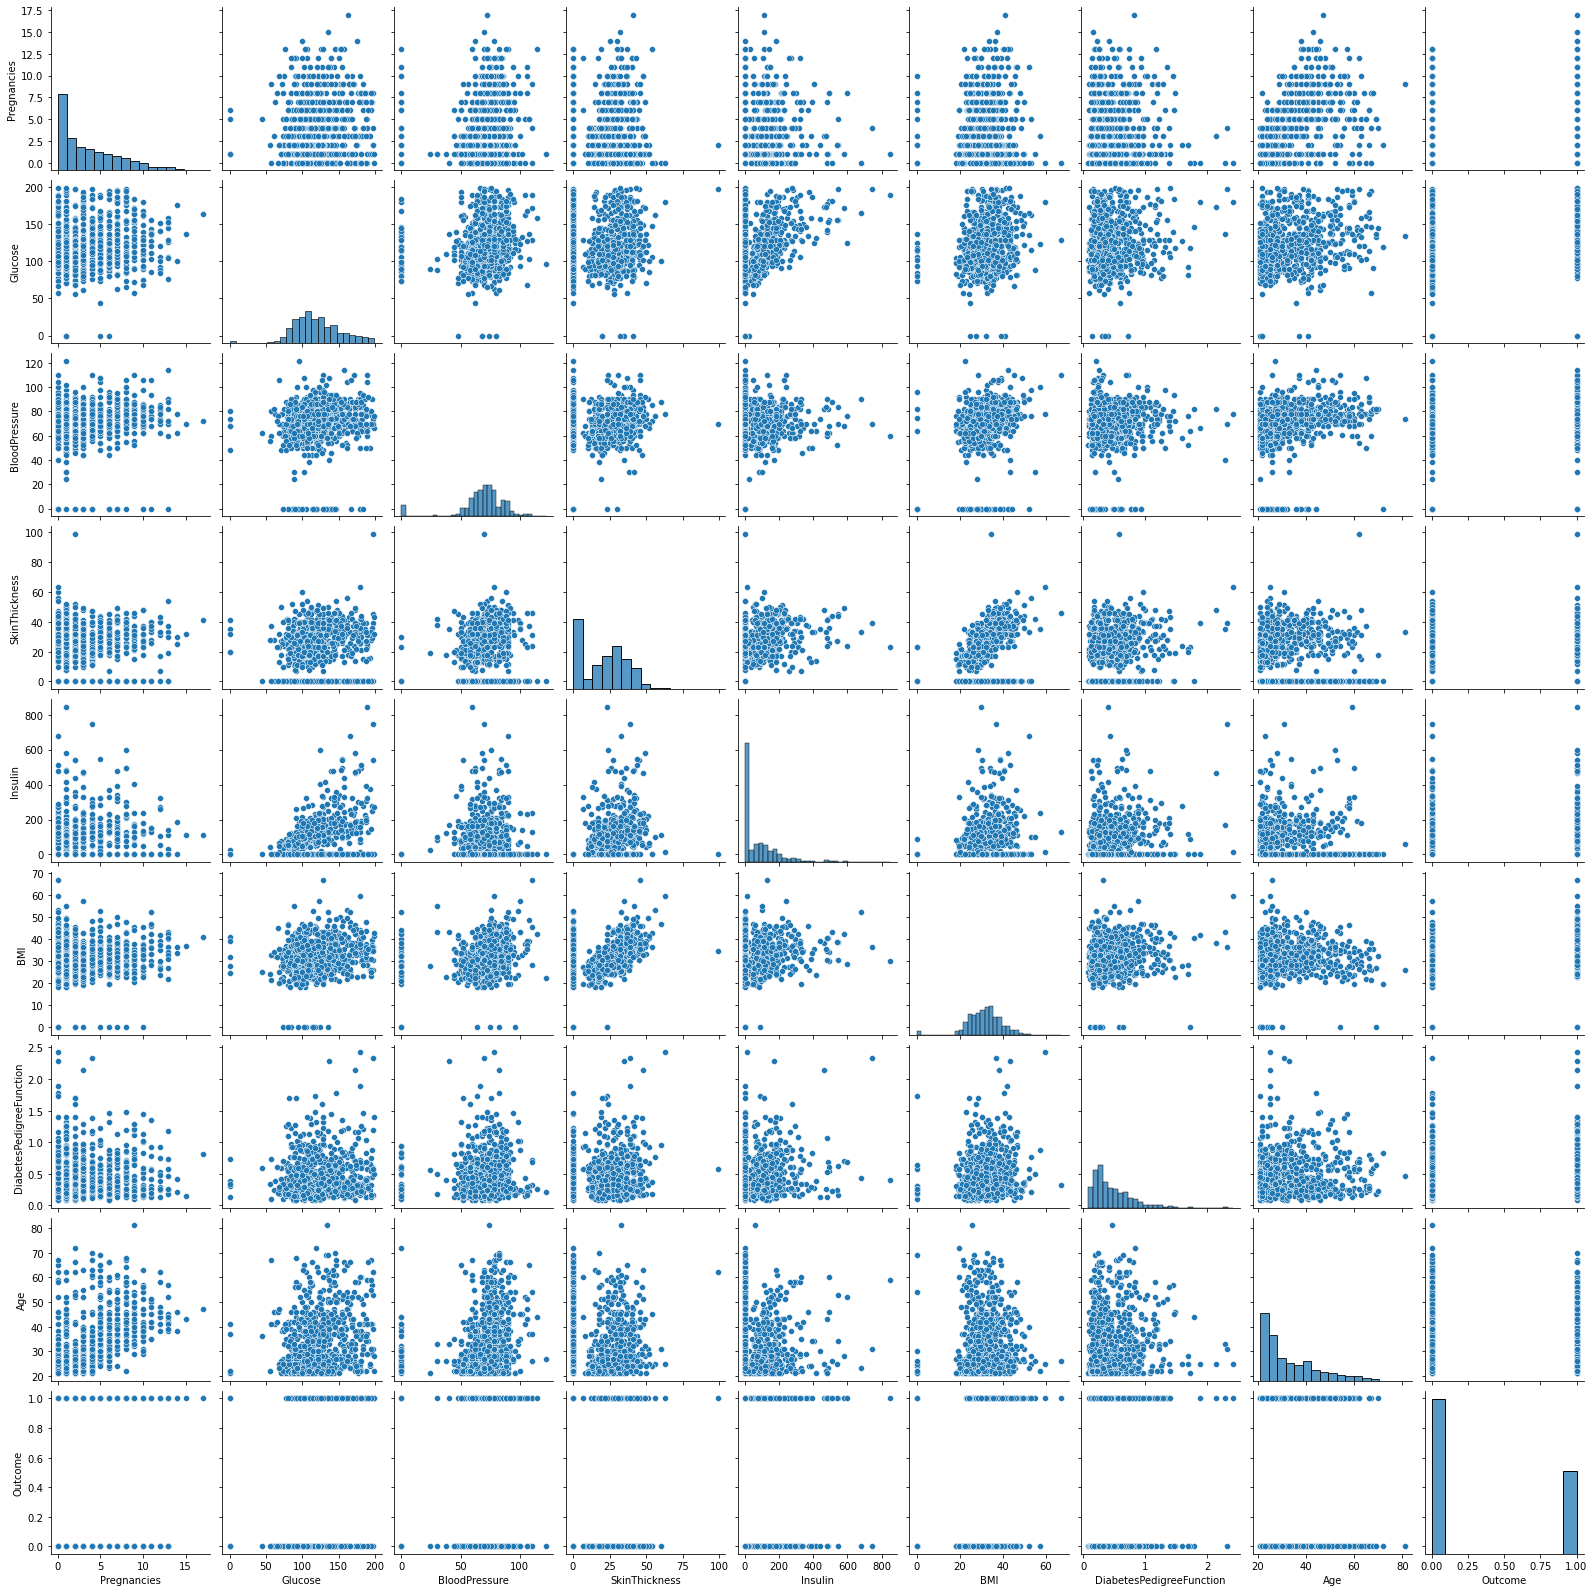

In [29]:
sns.pairplot(df)

Filling Missing Values

In [30]:
df_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [31]:
#Function to find median
def median_imp(var):   
    med_df = df_copy[df_copy[var].notnull()]
    med_df = med_df[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return med_df

In [32]:
median_imp('Glucose')

,Outcome,Glucose
0,0,107.0
1,1,140.0


In [33]:
df_copy.loc[(df_copy['Outcome']==0) & df_copy['Glucose'].isnull(),'Glucose'] = 107
df_copy.loc[(df_copy['Outcome']==1) & df_copy['Glucose'].isnull(),'Glucose'] = 140

In [34]:
median_imp('BloodPressure')

,Outcome,BloodPressure
0,0,70.0
1,1,74.5


In [35]:
df_copy.loc[(df_copy['Outcome']==0) & df_copy['BloodPressure'].isnull(),'BloodPressure'] = 70
df_copy.loc[(df_copy['Outcome']==1) & df_copy['BloodPressure'].isnull(),'BloodPressure'] = 74.5

In [36]:
median_imp('SkinThickness')

,Outcome,SkinThickness
0,0,27.0
1,1,32.0


In [37]:
df_copy.loc[(df_copy['Outcome']==0) & df_copy['SkinThickness'].isnull(),'SkinThickness'] = 27
df_copy.loc[(df_copy['Outcome']==1) & df_copy['SkinThickness'].isnull(),'SkinThickness'] = 32

In [38]:
median_imp('Insulin')

,Outcome,Insulin
0,0,102.5
1,1,169.5


In [39]:
df_copy.loc[(df_copy['Outcome']==0) & df_copy['Insulin'].isnull(),'Insulin'] = 102.5
df_copy.loc[(df_copy['Outcome']==1) & df_copy['Insulin'].isnull(),'Insulin'] = 169.5

In [40]:
median_imp('BMI')

,Outcome,BMI
0,0,30.1
1,1,34.3


In [41]:
df_copy.loc[(df_copy['Outcome']==0) & df_copy['BMI'].isnull(),'BMI'] = 30.1
df_copy.loc[(df_copy['Outcome']==1) & df_copy['BMI'].isnull(),'BMI'] = 34.3

In [42]:
df_copy.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Now our dataset is free from any null values so we can proceed further

Pair Plot after handeling missing values

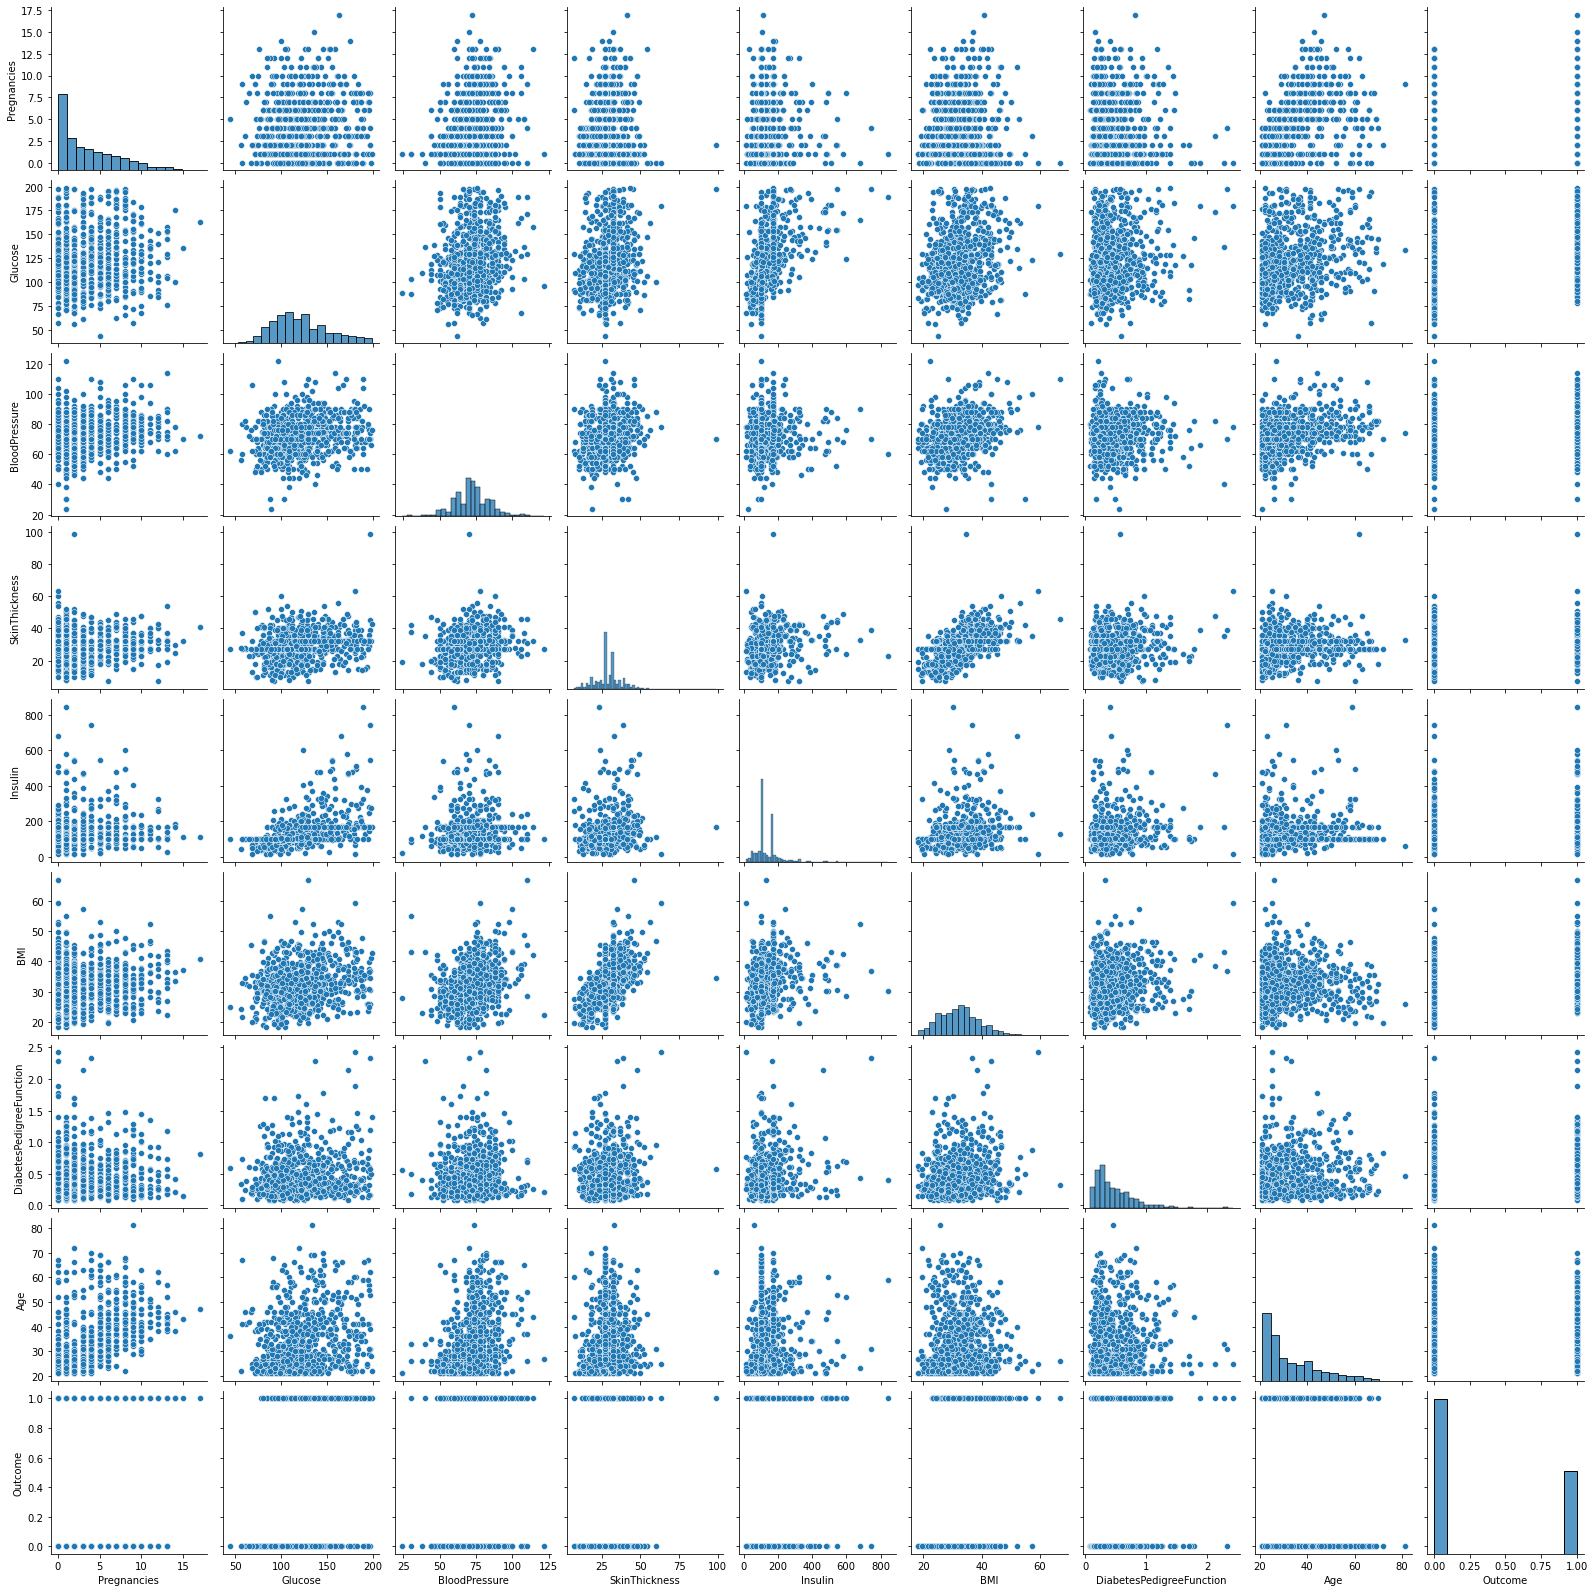

In [43]:
sns.pairplot(df_copy)

Count of types of columns in dataset

In [44]:
int_dtype = df.select_dtypes(include=['int64']).columns
float_dtype = df.select_dtypes(include=['float64']).columns
obj_dtype = df.select_dtypes(include=['object']).columns

In [45]:
print('No of integer columns in dataframe is :',len(int_dtype))
print('No of flaot columns in dataframe is   :',len(float_dtype))
print('No of object columns in dataframe is  :',len(obj_dtype))

No of integer columns in dataframe is : 7
No of flaot columns in dataframe is   : 2
No of object columns in dataframe is  : 0


<AxesSubplot:ylabel='count'>

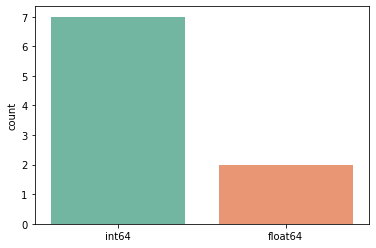

In [46]:
sns.countplot(x = df.dtypes.map(str),palette='Set2')

Count of diabetic and healty people in dataset

In [47]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [48]:
diab_count = df.Outcome.astype('category').cat.rename_categories(['Healthy','Diabetic'])

<AxesSubplot:xlabel='Outcome', ylabel='count'>

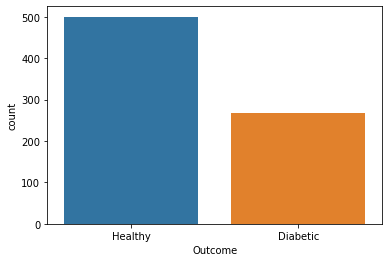

In [49]:
sns.countplot(x= diab_count)

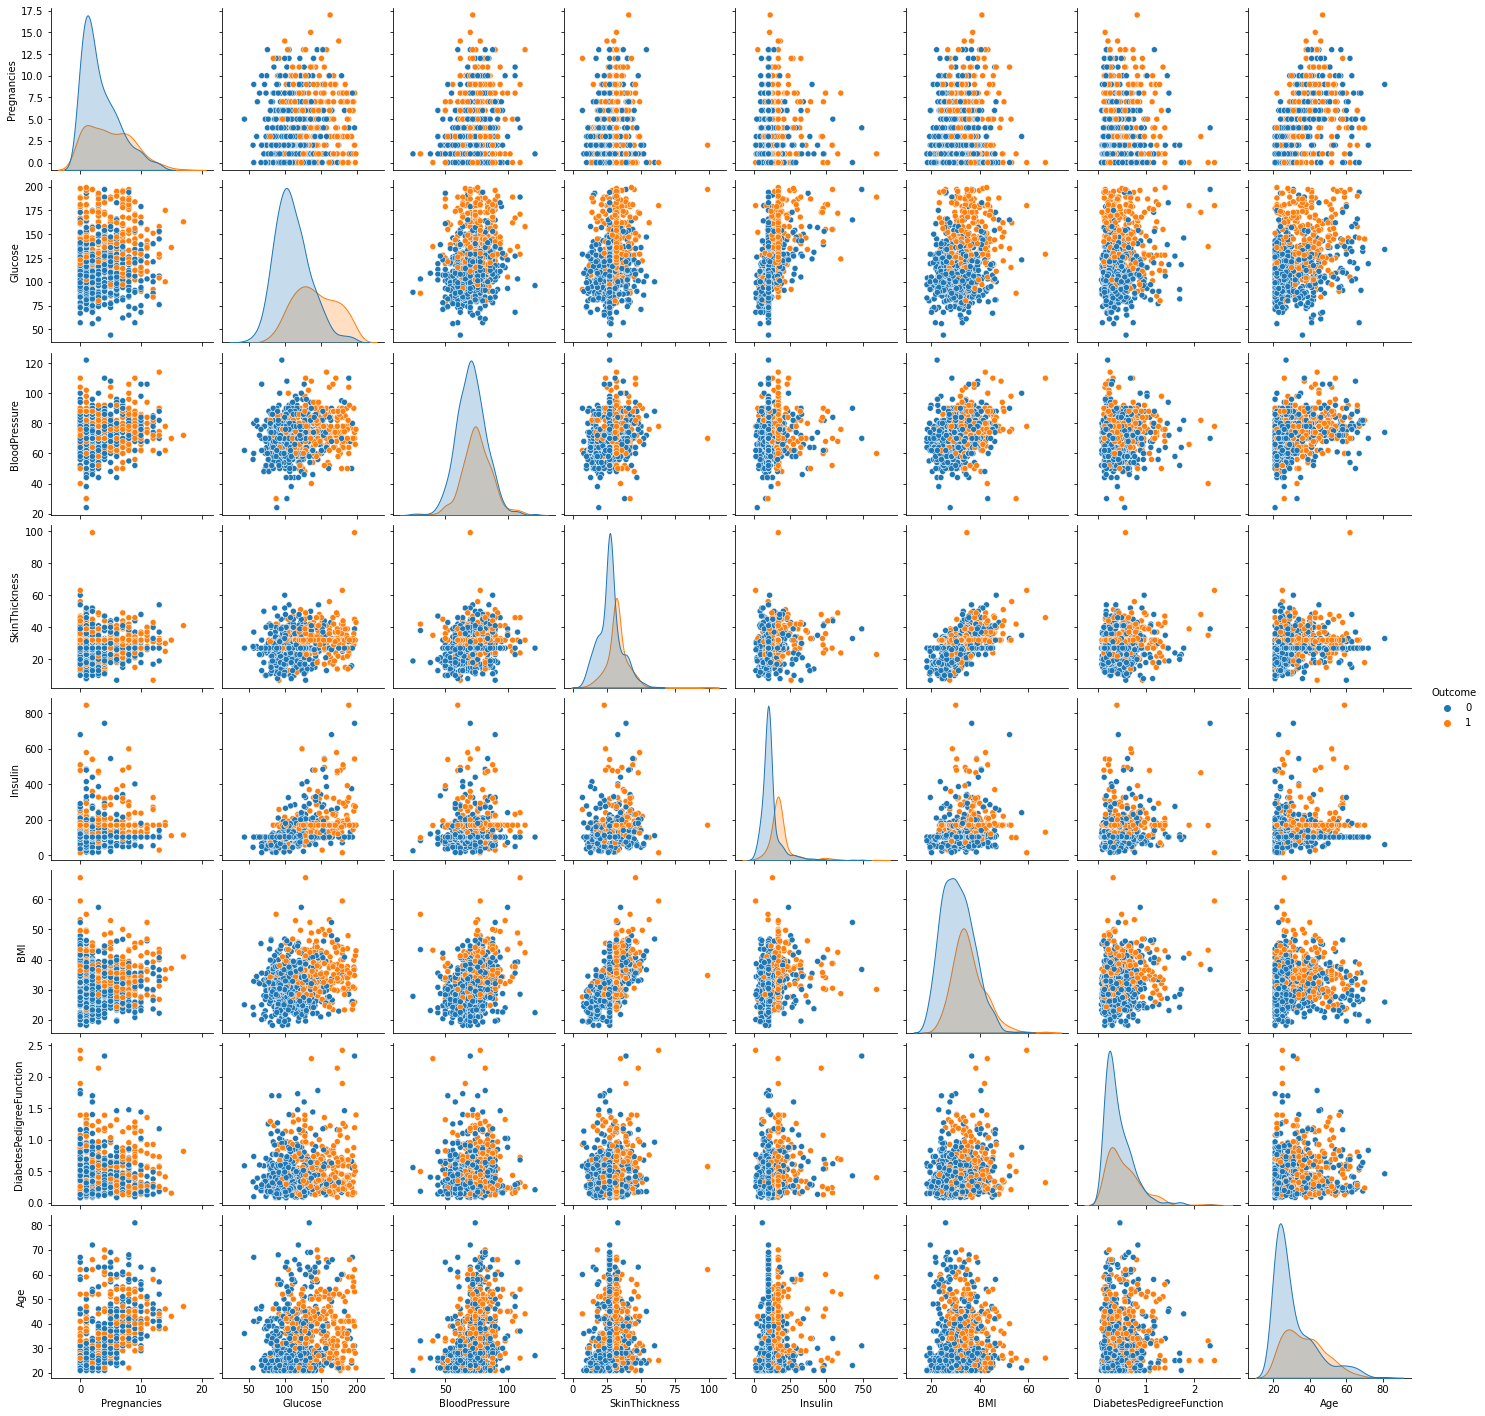

In [50]:
sns.pairplot(df_copy,hue = 'Outcome')

Heatmap of Original Dataset

<AxesSubplot:>

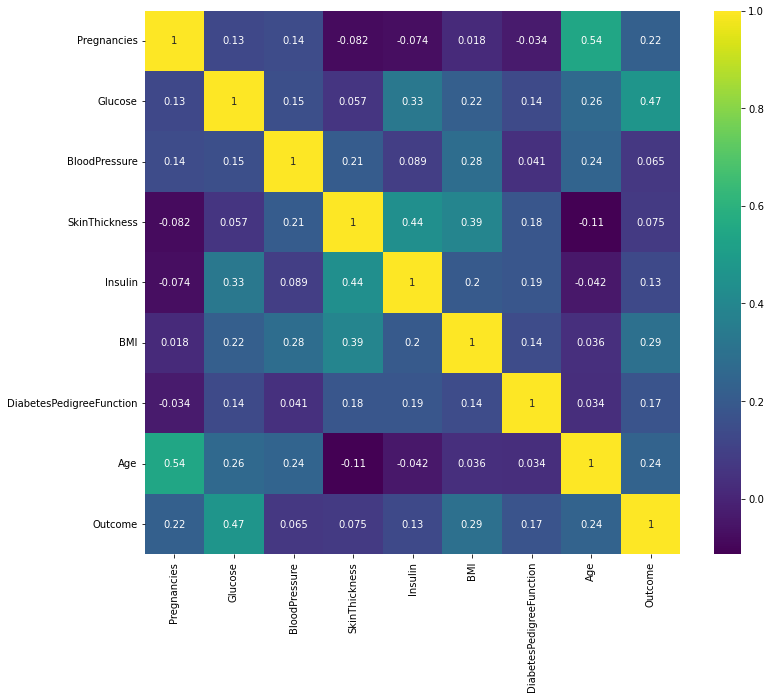

In [52]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap = 'viridis')

Heatmap of Clean Data

<AxesSubplot:>

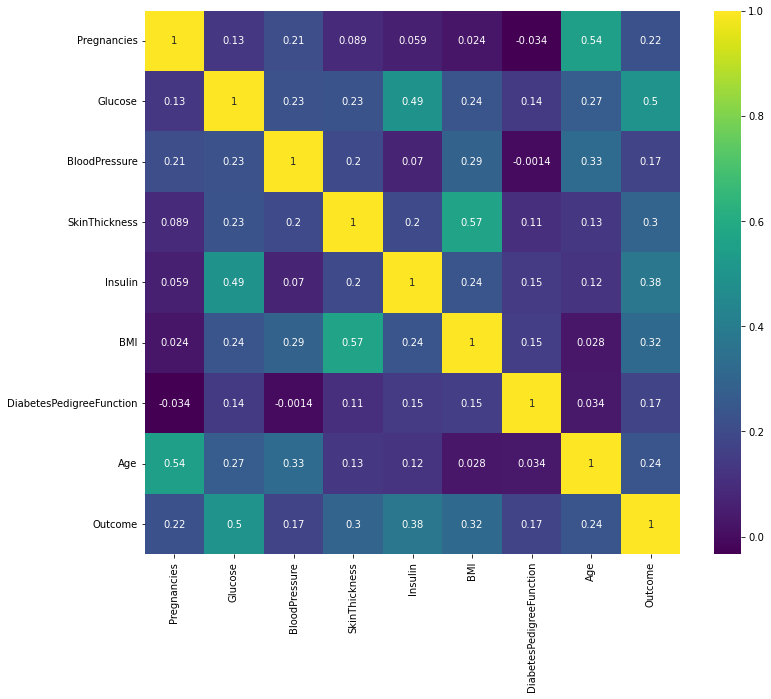

In [53]:
plt.figure(figsize=(12,10))
sns.heatmap(df_copy.corr(),annot=True,cmap = 'viridis')

From the above heatmap we see a bit of correlation between some columns i.e.

Age and Pregnancies = 0.54
Glucose and insulin = 0.49
SkinThickness and BMI = 0.57
Let's create some scatter plots for above mentioned column pairs to understand the relationship among the top correlation values:

In [54]:
def sctr_plot(var1,var2):
    sns.scatterplot(x = var1,y = var2, data = df_copy,hue = 'Outcome',marker = 'D')

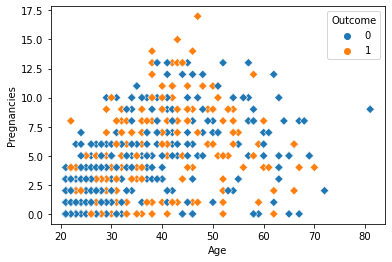

In [55]:
sctr_plot('Age','Pregnancies')

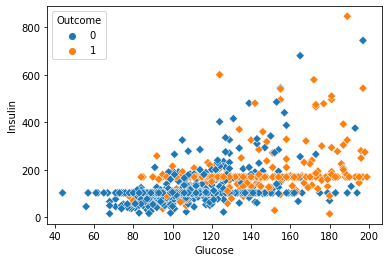

In [56]:
sctr_plot('Glucose','Insulin')

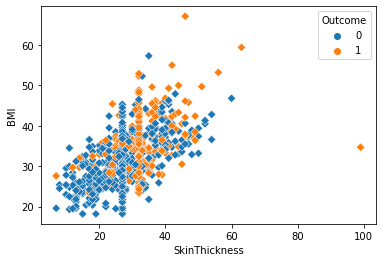

In [57]:
sctr_plot('SkinThickness','BMI')

Data Split for training and testing

In [58]:
X = df_copy.drop('Outcome',axis=1)
y=df_copy.Outcome

In [59]:
X.shape,y.shape

((768, 8), (768,))

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify = y)

In [61]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((537, 8), (231, 8), (537,), (231,))

Standardization
To bring the whole data at a same scale we'll perform satnadardization.

In [63]:
sc = StandardScaler()

In [64]:
X_train_scaled = sc.fit_transform(X_train)

In [65]:
X_test_scaled = sc.transform(X_test)

1. LogisticRegression Model

In [66]:
Log_model = LogisticRegression(max_iter=10000)

In [67]:
Log_model.fit(X_train_scaled,y_train)

LogisticRegression(max_iter=10000)

In [68]:
log_pred = Log_model.predict(X_test_scaled)

In [69]:
print(classification_report(y_test,log_pred))

              precision    recall  f1-score   support

           0       0.79      0.84      0.81       150
           1       0.66      0.58      0.62        81

    accuracy                           0.75       231
   macro avg       0.72      0.71      0.72       231
weighted avg       0.74      0.75      0.74       231



In [70]:
print(confusion_matrix(y_test,log_pred))
print('\n','Accuracy - ',accuracy_score(y_test,log_pred))

[[126  24]
 [ 34  47]]

 Accuracy -  0.7489177489177489


2. RandomForest Classifier

In [71]:
rfc = RandomForestClassifier()


In [72]:
n_estimators = [75,100,125,150,200]

In [73]:
max_features = [4,5,6,7,8]

In [74]:
bootstrap=[True,False]  

In [75]:
oob_score=[True,False]

In [76]:
param_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'bootstrap':bootstrap,
              'oob_score':oob_score}

In [77]:
grid = GridSearchCV(rfc,param_grid)

In [78]:
grid.fit(X_train_scaled,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': [4, 5, 6, 7, 8],
                         'n_estimators': [75, 100, 125, 150, 200],
                         'oob_score': [True, False]})

In [79]:
rfc_pred = grid.predict(X_test_scaled)

In [80]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90       150
           1       0.83      0.78      0.80        81

    accuracy                           0.87       231
   macro avg       0.86      0.85      0.85       231
weighted avg       0.86      0.87      0.86       231



In [81]:
print(confusion_matrix(y_test,log_pred))
print('\n','Accuracy - ',accuracy_score(y_test,rfc_pred))

[[126  24]
 [ 34  47]]

 Accuracy -  0.8658008658008658


In [82]:
grid.best_params_

{'bootstrap': True, 'max_features': 4, 'n_estimators': 75, 'oob_score': False}

3. Support Vector Machine

In [83]:
svc = SVC()

In [84]:
param_grid = {'C':[0.01,0.1,1,10],'kernel':['linear', 'poly', 'rbf', 'sigmoid']}

In [85]:
grid = GridSearchCV(svc,param_grid)

In [86]:
grid.fit(X_train_scaled,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [87]:
svc_pred = grid.predict(X_test_scaled)

In [88]:
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       150
           1       0.75      0.70      0.73        81

    accuracy                           0.81       231
   macro avg       0.80      0.79      0.79       231
weighted avg       0.81      0.81      0.81       231



In [89]:
print(confusion_matrix(y_test,log_pred))
print('\n','Accuracy - ',accuracy_score(y_test,svc_pred))

[[126  24]
 [ 34  47]]

 Accuracy -  0.8138528138528138


In [90]:
grid.best_params_

{'C': 1, 'kernel': 'rbf'}

4. K Nearest Neighbour

<AxesSubplot:>

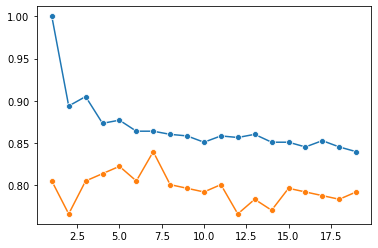

In [91]:
train_score = []
test_score = []
for i in range (1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled,y_train)
#     knn_pred = knn.predict(X_test)
    train_score.append(knn.score(X_train_scaled,y_train))
    test_score.append(knn.score(X_test_scaled,y_test))
    
sns.lineplot(x = range(1,20),y = train_score,marker='o')
sns.lineplot(x = range(1,20),y = test_score,marker = 'o')

0.8398268398268398


<AxesSubplot:>

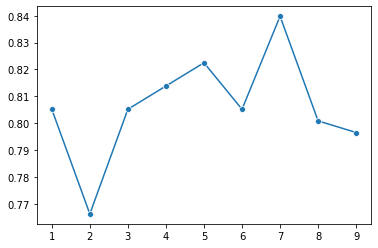

In [92]:
acc_score = []
for i in range (1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled,y_train)
    knn_pred = knn.predict(X_test_scaled)
    
    acc_score.append(accuracy_score(y_test,knn_pred))
print(max(acc_score))
    

sns.lineplot(x = range(1,10),y = acc_score,marker='o')

From above results this could be concluded that n=7 gives the best results so we'll take n_neighbors = 7 for final model

In [93]:
final_knn_model = KNeighborsClassifier(n_neighbors=7)

In [94]:
final_knn_model.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=7)

In [95]:
knn_pred = final_knn_model.predict(X_test_scaled)

In [96]:
print(accuracy_score(y_test,knn_pred))

0.8398268398268398


In [97]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       150
           1       0.78      0.75      0.77        81

    accuracy                           0.84       231
   macro avg       0.83      0.82      0.82       231
weighted avg       0.84      0.84      0.84       231



In [98]:
print(confusion_matrix(y_test,knn_pred))

[[133  17]
 [ 20  61]]


5. Decision Tree

In [99]:
dt = DecisionTreeClassifier(random_state=42)

In [101]:
param_grid = {'criterion' : ["gini", "entropy"],
              'min_samples_split' : [2,3,4,5],
              'max_features' : [4,5,6,7,8]
              }


In [102]:
grid_dt = GridSearchCV(dt,param_grid)

In [103]:
grid_dt.fit(X_train_scaled,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': [4, 5, 6, 7, 8],
                         'min_samples_split': [2, 3, 4, 5]})

In [104]:
grid_dt.best_params_

{'criterion': 'entropy', 'max_features': 6, 'min_samples_split': 3}

In [105]:
dt_pred = grid_dt.predict(X_test_scaled)

In [106]:
print(accuracy_score(y_test,dt_pred))

0.8614718614718615


In [107]:
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90       150
           1       0.84      0.75      0.79        81

    accuracy                           0.86       231
   macro avg       0.85      0.84      0.84       231
weighted avg       0.86      0.86      0.86       231



In [108]:
dt_cm = confusion_matrix(y_test,dt_pred)

In [109]:
print(confusion_matrix(y_test,dt_pred))

[[138  12]
 [ 20  61]]


In [110]:
grid_dt.best_params_

{'criterion': 'entropy', 'max_features': 6, 'min_samples_split': 3}

In a Nutshell
Accuracy , Sensitivity and Specificity

In [111]:
models = [
{
    'label': 'Logistic Regression',
    'model': LogisticRegression(),
},
{
    'label': 'KNeighbors Classifier',
    'model': KNeighborsClassifier(n_neighbors=7),
},
{
    'label' : 'Support Vector Classifier',
    'model' : SVC(C= 1, kernel='rbf',probability=True),
},
{
    'label' : 'Decision Tress',
    'model' : DecisionTreeClassifier(random_state=42,criterion= 'entropy', max_features= 6, min_samples_split= 3),
},
    {
    'label' : 'Random Forest Classifier',
    'model' : RandomForestClassifier(bootstrap= True, max_features= 6, n_estimators= 100,oob_score= True),
},
]

In [112]:
accu = []
model_name= []
sensitivity = []
specificity = []
for m in models:
    model1 = m['model']
    model1.fit(X_train_scaled, y_train) # train the model
    pred = model1.predict(X_test_scaled) # predict the test data
    cm = confusion_matrix(y_test,pred)    

    accu.append(accuracy_score(y_test,pred))
    model_name.append(m['label'])
#     sensitivity.append(cm[0,0]/(cm[0,0]+cm[0,1])
#     specificity.append(cm[1,1]/(cm[1,0]+cm[1,1])
    
    models_accuracy= pd.DataFrame(data=accu,index = model_name,columns=['Accuracy Score'] )
models_accuracy    

,Accuracy Score
Logistic Regression,0.748918
KNeighbors Classifier,0.839827
Support Vector Classifier,0.813853
Decision Tress,0.861472
Random Forest Classifier,0.883117


In [113]:
accu = []
model_name= []
sensitivity = []
specificity = []
for m in models:
    model1 = m['model']
    model1.fit(X_train_scaled, y_train) # train the model
    pred = model1.predict(X_test_scaled) # predict the test data
    cm = confusion_matrix(y_test,pred)    
    

    accu.append(accuracy_score(y_test,pred))
    model_name.append(m['label'])
        
    sensitivity.append(cm[0,0]/(cm[0,0]+cm[0,1]))
    specificity.append(cm[1,1]/(cm[1,0]+cm[1,1]))
    
    models_accu_sen_sp= pd.DataFrame(data=(accu,sensitivity,specificity),index = ['Accuracy','Sensitivity','Specificity'],
                                    columns=[model_name]).T
models_accu_sen_sp    

,Accuracy,Sensitivity,Specificity
Logistic Regression,0.748918,0.840000,0.580247
KNeighbors Classifier,0.839827,0.886667,0.753086
Support Vector Classifier,0.813853,0.873333,0.703704
Decision Tress,0.861472,0.920000,0.753086
Random Forest Classifier,0.874459,0.920000,0.790123


Combined ROC Curve for all the models

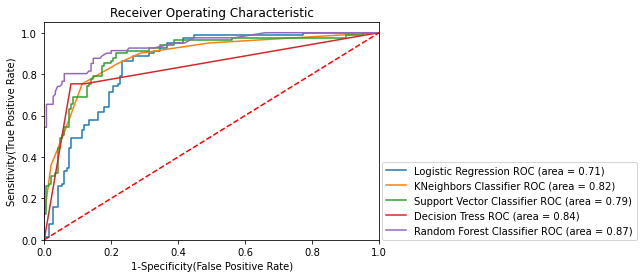

In [114]:
# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(X_train_scaled, y_train) # train the model
    y_pred=model.predict(X_test_scaled) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test_scaled)[:,1])
# Calculate Area under the curve to display on the plot
    auc = roc_auc_score(y_test,model.predict(X_test_scaled))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc =(1.01,0))
plt.show()   # Display

# So the above curve gives the max area under the curve for Random Forest Classifier, hence this could be the best algorithm for the problem.